In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from src.definitions import ROOT_DIR
from src.data.utils import save_pickle

In [3]:
features_fn = ROOT_DIR / 'data/interim/2016/features.pickle'
assert features_fn.exists()

In [4]:
features = pd.read_pickle(features_fn)

In [5]:
features.sample(10)

,tot_appr_val,prior_tot_appr_val,prior_land_val,im_sq_ft,fixtures_total,room_full_bath,grade_adjustment,market_area_1_dscr,dscr
549299,366025.0,332750.0,83544.0,2986.0,10.0,2.0,A+,ISD 19 - South of I-10 Katy Freeway,Excellent
193245,439230.0,399300.0,240000.0,1616.0,10.0,2.0,C+,"1F Heights, Brooksmith, Norhill Areas",Average
306626,124470.0,117261.0,19044.0,2730.0,7.0,1.0,B-,1C South of Old Spanish Trail btwn SH 288 and ...,Good
813153,312785.0,284350.0,51013.0,3026.0,14.0,2.0,B,ISD 27 - West of NASA Parkway (I-45 Area),Good
767098,101640.0,92400.0,15435.0,1654.0,11.0,2.0,C,"ISD 04 - Far West, South of US 290/North of FM...",Average
426000,57415.0,57415.0,12701.0,1288.0,5.0,1.0,D,"ISD 09 - Outside Airport Tiers, East of I-45",Low
555704,124223.0,115381.0,21450.0,1858.0,8.0,2.0,C,"ISD 04 - Southwest, Outside Hwy 6, South of FM...",Average
832830,206321.0,199773.0,39647.0,1857.0,10.0,2.0,C+,ISD 27 - West of NASA Parkway (I-45 Area),Average
65064,147649.0,132187.0,21303.0,2053.0,11.0,2.0,C,ISD 09 - Airport Tiers Area,Average
833171,650000.0,682000.0,142237.0,3957.0,23.0,4.0,A+,"ISD 04 - South of US 290, btwn Beltway 8 and H...",Superior


In [6]:
features['market_area_1_dscr'].unique()

array(['1B South of US 90, West of SH 288', 'ISD 21 - Pasadena ISD',
       'ISD 06 - Channelview ISD', 'ISD 26 - Tomball ISD',
       'ISD 04 - Far West, South of US 290/North of FM 529',
       'ISD 09 - Outside Airport Tiers, West of I-45',
       'ISD 04 - Far Northwest, Outside Hwy 6', 'ISD 17 - Klein ISD',
       'ISD 24 - South of FM 1960', 'ISD 08 - Alief General',
       'ISD 19 - North of I-10 Katy Freeway',
       '1F Lazybrook, Timbergrove, Washington Corridor',
       'ISD 18 - Outside Airport Tiers,  Atascocita Area',
       'ISD 04 - Southwest, Outside Hwy 6, South of FM 529',
       'ISD 04 - Northwest, btwn Beltway 8 and Hwy 6',
       'ISD 23 - Sheldon ISD',
       '1F  Highland Heights, Acres Homes, Pinemont Area',
       '1D Lyons, Denver/Houston Harbor, Pleasantville',
       '1B NRG Park, Texas Medical Center Areas',
       '1A Tanglewood, Galleria, Briargrove Areas',
       '1B Bellaire, West University, Southampton Areas',
       'ISD 27 - West of NASA Parkway (

In [7]:
cond0 = features['market_area_1_dscr'] == 'ISD 17 - Klein ISD'

klein = features.loc[cond0, :]

In [8]:
klein.shape

(70367, 9)

<AxesSubplot:>

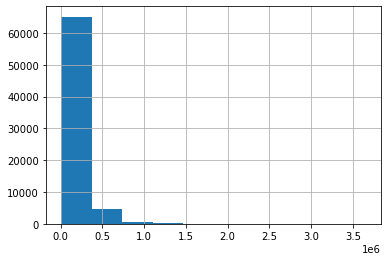

In [9]:
klein['tot_appr_val'].hist()

In [10]:
klein.columns

Index(['tot_appr_val', 'prior_tot_appr_val', 'prior_land_val', 'im_sq_ft',
       'fixtures_total', 'room_full_bath', 'grade_adjustment',
       'market_area_1_dscr', 'dscr'],
      dtype='object')

In [11]:
# cond0 = klein['tot_appr_val'] == 
cond1 = klein['prior_tot_appr_val'] == 267810
cond2 = klein['prior_land_val'] == 36313
cond3 = klein['im_sq_ft'] == 2697
cond4 = klein['fixtures_total'] == 15
cond5 = klein['room_full_bath'] == 3
cond6 = klein['dscr'] == 'Good'

In [12]:
klein.loc[cond1, :]

,tot_appr_val,prior_tot_appr_val,prior_land_val,im_sq_ft,fixtures_total,room_full_bath,grade_adjustment,market_area_1_dscr,dscr
147030,263704.0,267810.0,36313.0,2697.0,15.0,3.0,B-,ISD 17 - Klein ISD,Good


In [13]:
klein = klein.drop(labels=['grade_adjustment', 'market_area_1_dscr'], axis=1)

In [14]:
klein

,tot_appr_val,prior_tot_appr_val,prior_land_val,im_sq_ft,fixtures_total,room_full_bath,dscr
82,269709.0,245190.0,47952.0,3876.0,13.0,3.0,Good
83,316624.0,259486.0,48754.0,4111.0,15.0,3.0,Good
84,291296.0,236650.0,48930.0,3760.0,15.0,3.0,Good
85,283893.0,258085.0,49026.0,3928.0,16.0,1.0,Good
86,249603.0,226912.0,48650.0,3402.0,16.0,3.0,Good
...,...,...,...,...,...,...,...
957555,272603.0,247821.0,48662.0,3760.0,15.0,3.0,Good
957556,269830.0,245300.0,48754.0,3781.0,13.0,3.0,Good
957557,269047.0,244589.0,48637.0,3760.0,15.0,3.0,Good
957558,263793.0,239812.0,48640.0,4111.0,15.0,3.0,Good


In [16]:
dscr_order = {'Superior': 5, 'Excellent': 4, 'Good': 3, 'Average': 2, 'Low': 1, 'Very Low': 0}

In [24]:
klein['dscr'] = klein['dscr'].map(dscr_order)

In [25]:
klein

,tot_appr_val,prior_tot_appr_val,prior_land_val,im_sq_ft,fixtures_total,room_full_bath,dscr
82,269709.0,245190.0,47952.0,3876.0,13.0,3.0,3
83,316624.0,259486.0,48754.0,4111.0,15.0,3.0,3
84,291296.0,236650.0,48930.0,3760.0,15.0,3.0,3
85,283893.0,258085.0,49026.0,3928.0,16.0,1.0,3
86,249603.0,226912.0,48650.0,3402.0,16.0,3.0,3
...,...,...,...,...,...,...,...
957555,272603.0,247821.0,48662.0,3760.0,15.0,3.0,3
957556,269830.0,245300.0,48754.0,3781.0,13.0,3.0,3
957557,269047.0,244589.0,48637.0,3760.0,15.0,3.0,3
957558,263793.0,239812.0,48640.0,4111.0,15.0,3.0,3


In [34]:
from sklearn.cluster import KMeans

# Check for NaNs

In [35]:
klein.isna().sum() / klein.shape[0]

tot_appr_val          0.000000
prior_tot_appr_val    0.003396
prior_land_val        0.003396
im_sq_ft              0.000000
fixtures_total        0.000000
room_full_bath        0.000000
dscr                  0.000000
dtype: float64

## Remove NaNs

In [38]:
klein = klein.dropna()

# Find neighbours

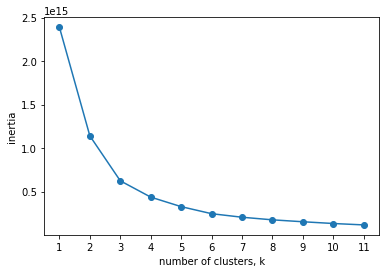

In [40]:
ks = range(1, 12)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(klein)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Seems like 6 is a good choice

In [54]:
model = KMeans(n_clusters=6)

In [55]:
labels = model.fit_predict(klein)

In [44]:
from sklearn.manifold import TSNE

In [45]:
model = TSNE(learning_rate=100)

In [46]:
transformed = model.fit_transform(klein)

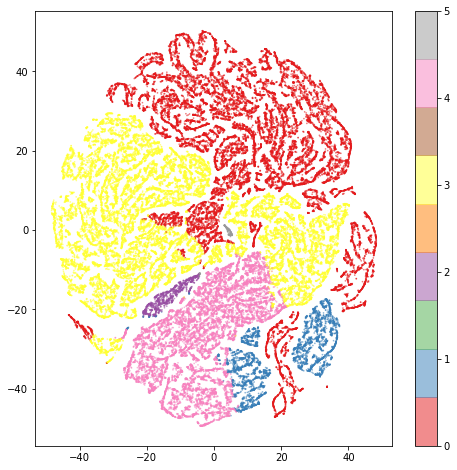

In [73]:
plt.figure(figsize=(8, 8))
plt.scatter(transformed[:, 0], transformed[:, 1], c=labels, cmap='Set1', alpha=0.5, s=0.5)
plt.colorbar()
plt.show()

In [58]:
klein_labeled = klein.copy()

klein_labeled['kmeans_label'] = labels

In [62]:
klein_labeled.loc[147030, :]

tot_appr_val          263704.0
prior_tot_appr_val    267810.0
prior_land_val         36313.0
im_sq_ft                2697.0
fixtures_total            15.0
room_full_bath             3.0
dscr                       3.0
kmeans_label               4.0
Name: 147030, dtype: float64

So my house is in label 4

In [76]:
cond0 = klein_labeled['kmeans_label'] == 4

comps = klein_labeled.loc[cond0, :]

In [77]:
comps.sample(10)

,tot_appr_val,prior_tot_appr_val,prior_land_val,im_sq_ft,fixtures_total,room_full_bath,dscr,kmeans_label
794141,322492.0,304073.0,54720.0,4567.0,18.0,3.0,4,4
851145,319000.0,290000.0,56050.0,3514.0,13.0,2.0,4,4
752298,325000.0,327800.0,54395.0,3784.0,18.0,3.0,4,4
99515,242027.0,242027.0,34500.0,2998.0,14.0,2.0,3,4
870598,261344.0,237586.0,43306.0,2657.0,14.0,2.0,3,4
938725,301883.0,301883.0,45900.0,3025.0,12.0,2.0,3,4
948678,263511.0,239556.0,45064.0,3421.0,16.0,3.0,3,4
769908,325211.0,302459.0,45402.0,4641.0,19.0,3.0,3,4
4577,310781.0,290088.0,59216.0,3351.0,16.0,4.0,3,4
776066,271000.0,239648.0,44567.0,3251.0,18.0,3.0,3,4


In [78]:
comps.shape

(12208, 8)

<AxesSubplot:>

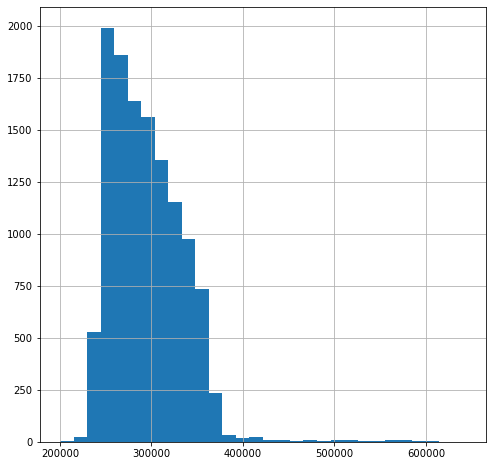

In [81]:
plt.figure(figsize=(8, 8))
comps['tot_appr_val'].hist(bins=30)

In [82]:
mean = comps['tot_appr_val'].mean()
std = comps['tot_appr_val'].std()

In [83]:
z = (comps['tot_appr_val'] - mean) / std

In [84]:
my_value = 263704.0

In [85]:
z_my_value = (my_value - mean) / std

<AxesSubplot:>

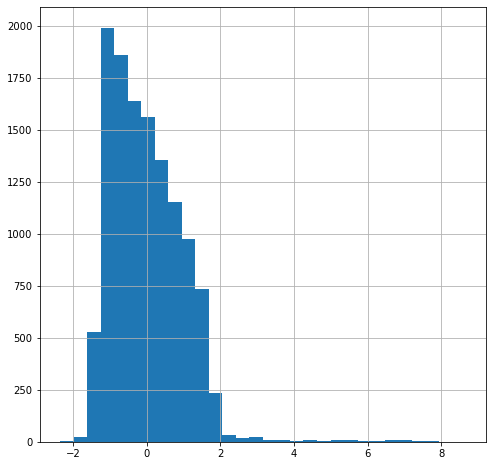

In [87]:
plt.figure(figsize=(8, 8))
z.hist(bins=30)

In [126]:
# cond1 = klein['prior_tot_appr_val'] == 267810
# cond2 = klein['prior_land_val'] == 36313
cond3 = klein['im_sq_ft'].between(2697 - 100, 2697 + 100)
cond4 = klein['fixtures_total'] == 15
cond5 = klein['room_full_bath'] == 3
cond6 = klein['dscr'] == 3

neighbours = klein.loc[cond3 & cond4 & cond5 & cond6, :]

<AxesSubplot:>

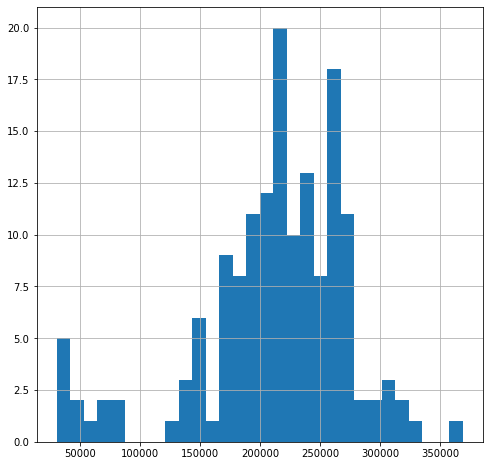

In [127]:
plt.figure(figsize=(8, 8))
neighbours['prior_tot_appr_val'].hist(bins=30)

In [128]:
neighbours.shape

(154, 7)

In [129]:
neighbours.shape

(154, 7)